In [1]:
# Toggle code on/off
from IPython.display import HTML
# This script provides a button to toggle display code on/off
HTML('''<script> code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Toggle code on/off"></form>''')

In [2]:
# Import Python libraries and set up environment
import numpy as np
import math
import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import planetRad as pr
import planetThermo as pt
import planets
import prettyPlots
%matplotlib inline

# Directory to output figure files
figdir = '/Users/phayne/anaconda3/envs/planets/figures'

# Directory containing data
datadir = '/Users/phayne/anaconda3/envs/planets/data'

# Make plots pretty
prettyPlots.setStyle()

# Import Europa properties
europa = planets.Europa

## Plume detection by E-THEMIS

*Paul O. Hayne*

Given their expected low vapor densities and small ice particle sizes ($\sim1~\mu$m ?), Europa's plumes are extremely unlikely to be detected in the thermal IR. Nonetheless, we investigate this possibility here, by estimating the infrared opacity and radiance for the solid particles and the gas in a model plume.

### Ice plume

For a plume with horizontal dimension $H$ and ice particle number density $n$ (m$^{-3}$), the line-of-sight column contains $N = nH$ particles per square meter. Given the particle radius $r$ and extinction efficiency, $Q_\mathrm{ext}(\lambda)$ at wavelength $\lambda$, the optical depth is

\begin{equation}
    \tau(\lambda) = \pi r^2 Q_\mathrm{ext}(\lambda)N
\end{equation}

We assume spherical particles with single-scattering albedo $\varpi_0$, and intrinsic emissivity $\epsilon_\lambda \approx Q_\mathrm{abs} = (1-\varpi_0)Q_\mathrm{ext}$. As seen in emission, the infrared spectral radiance of the plume is then

\begin{equation}
    I_\lambda \approx \left(1-e^{-\tau}\right)\epsilon_\lambda B_\lambda(T)
\end{equation}

where $B_\lambda$ is the Planck function, and

\begin{equation}
    T = \left( \frac{(1-A)F}{4\epsilon \sigma} \right)^{1/4}
\end{equation}

is the equilibrium temperature for the solar flux $F = S/R_\mathrm{AU}^2$, given the solar distance $R_\mathrm{AU}$ and the solar constant, $S$. For albedo $A = 0.6$, $T \approx 100$ K. Each spectral channel has a different response function $f(\lambda)$, though here we use average values over the complete bandpass.

In [3]:
# Load H2O ice spectral data
# Based on optical constants from Warren and Brandt (2008) and Mie theory
wl = (np.genfromtxt(datadir+'/h2o_warren_LT1mm.wnr'))[:,0] # Wavelength [micron]
mie = (np.genfromtxt(datadir+'/h2o_warren_a3g4_00001p00.mie')) # Mie parameters
Q_ext = mie[:,0] # Extinction efficiency
w0 = mie[:,1] # Single-scattering albedo

# Calculate single-particle emissivity
e_particle = (1-w0)*Q_ext

# Equilibrium temperature of particles
T = europa.Teq()

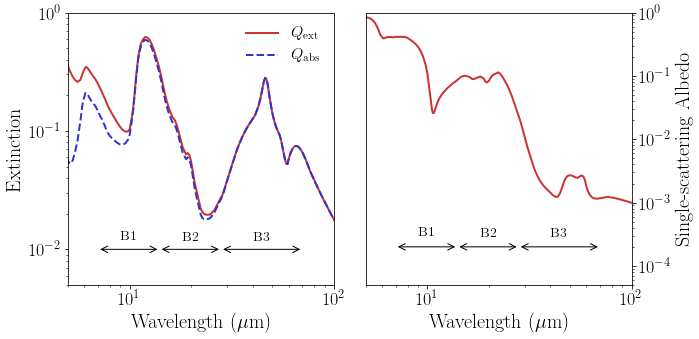

In [4]:
# Plot extinction efficiency over relevant wavelength range
fig1 = plt.figure(figsize=[10,5])

c1 = [0.8,0.2,0.2] # first color
c2 = [0.2,0.2,0.8] # second color
c3 = [0.2,0.6,0.4] # third color
wlmin, wlmax = 5.0, 100.0 # Approx. wavelength range covered by E-THEMIS

# Extinction plot
sub1 = fig1.add_subplot(121)
sub1.loglog(wl, Q_ext, color=c1, label='$Q_\mathrm{ext}$')
sub1.set_xlim([wlmin,wlmax])
sub1.set_ylim([0.5e-2,1])
sub1.set_xlabel('Wavelength ($\mu$m)')
sub1.set_ylabel('Extinction')

# Plot absorption efficiency
sub1.loglog(wl, e_particle, '--', color=c2, label='$Q_\mathrm{abs}$')

# E-THEMIS wavelength bands
wl_B1 = [7,14]
wl_B2 = [14,28]
wl_B3 = [28,70]
sub1.annotate(s='', xy=(wl_B1[0],1e-2), xytext=(wl_B1[1],1e-2), arrowprops=dict(arrowstyle='<->',fc='k'))
sub1.annotate(s='', xy=(wl_B2[0],1e-2), xytext=(wl_B2[1],1e-2), arrowprops=dict(arrowstyle='<->',fc='k'))
sub1.annotate(s='', xy=(wl_B3[0],1e-2), xytext=(wl_B3[1],1e-2), arrowprops=dict(arrowstyle='<->',fc='k'))
sub1.text(9, 1.2e-2, 'B1', fontsize=14)
sub1.text(18, 1.2e-2, 'B2', fontsize=14)
sub1.text(40, 1.2e-2, 'B3', fontsize=14)
sub1.legend(frameon=False)

# Single-scattering albedo
sub2 = fig1.add_subplot(122)
sub2.loglog(wl, w0, color=c1, label='$w_0$')
sub2.set_xlim([wlmin,wlmax])
sub2.set_ylim([0.5e-4,1])
sub2.set_xlabel('Wavelength ($\mu$m)')
sub2.set_ylabel('Single-scattering Albedo')

# E-THEMIS wavelength bands
sub2.annotate(s='', xy=(wl_B1[0],2e-4), xytext=(wl_B1[1],2e-4), arrowprops=dict(arrowstyle='<->',fc='k'))
sub2.annotate(s='', xy=(wl_B2[0],2e-4), xytext=(wl_B2[1],2e-4), arrowprops=dict(arrowstyle='<->',fc='k'))
sub2.annotate(s='', xy=(wl_B3[0],2e-4), xytext=(wl_B3[1],2e-4), arrowprops=dict(arrowstyle='<->',fc='k'))
sub2.text(9, 3e-4, 'B1', fontsize=14)
sub2.text(18, 3e-4, 'B2', fontsize=14)
sub2.text(40, 3e-4, 'B3', fontsize=14)
sub2.yaxis.tick_right()
sub2.yaxis.set_label_position('right')

plt.tight_layout()
plt.show()

In [5]:
# Band-averaged parameters
print('         B1      B2      B3')
print('       ---------------------')

# Extinction efficiency:
Q_ext_1 = np.mean(Q_ext[np.logical_and(wl > wl_B1[0], wl < wl_B1[1])])
Q_ext_2 = np.mean(Q_ext[np.logical_and(wl > wl_B2[0], wl < wl_B2[1])])
Q_ext_3 = np.mean(Q_ext[np.logical_and(wl > wl_B3[0], wl < wl_B3[1])])
print('Q_ext: {:.3f}   {:.3f}   {:.3f}'.format(Q_ext_1, Q_ext_2, Q_ext_3))

# Single-scattering albedo:
w0_1 = np.mean(w0[np.logical_and(wl > wl_B1[0], wl < wl_B1[1])])
w0_2 = np.mean(w0[np.logical_and(wl > wl_B2[0], wl < wl_B2[1])])
w0_3 = np.mean(w0[np.logical_and(wl > wl_B3[0], wl < wl_B3[1])])
print('w_0:   {:.3f}   {:.3f}   {:.3f}'.format(w0_1, w0_2, w0_3))

         B1      B2      B3
       ---------------------
Q_ext: 0.281   0.097   0.113
w_0:   0.193   0.091   0.003


We determine the signal-to-noise ratio ($\mathrm{SNR}$) on the plume measurement from the $\mathrm{SNR}$ at $T=100$ K ratio of the plume radiance in each spectral band, to that of a blackbody at the same temperature:

\begin{equation}
    \left( \mathrm{SNR} \right)_{\mathrm{ice},\lambda} = \frac{I_\lambda}{B_\lambda(T)}\left(\mathrm{SNR}\right)_{\mathrm{100~K},\lambda} \approx \left(1-e^{-\tau}\right)\left(1-\varpi_0\right)Q_\mathrm{ext}\left(\mathrm{SNR}\right)_{\mathrm{100~K},\lambda}
\end{equation}

                      B1     B2     B3   
                    --------------------
Assumed NETD @100 K: 2.00   1.00   0.10


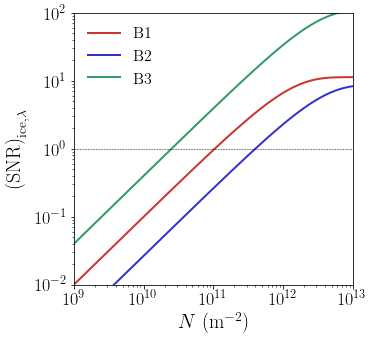

In [6]:
# Plume radiance calculation

NETD = np.array([2.0, 1.0, 0.1]) # Noise-equivalent temperature difference [K]
SNR = T/NETD
print('                      B1     B2     B3   ')
print('                    --------------------')
print('Assumed NETD @100 K: {:.2f}   {:.2f}   {:.2f}'.format(NETD[0],NETD[1],NETD[2]))

N = np.logspace(9,13,100) # column density [m-2]
r = 1.0e-6 # particle radius [m]

# Opacity
tau1 = np.pi*r**2*Q_ext_1*N
tau2 = np.pi*r**2*Q_ext_2*N
tau3 = np.pi*r**2*Q_ext_3*N

# Radiance factor
f1 = (1-np.exp(-tau1))*(1-w0_1)*Q_ext_1
f2 = (1-np.exp(-tau2))*(1-w0_2)*Q_ext_2
f3 = (1-np.exp(-tau3))*(1-w0_3)*Q_ext_3

# Plot results
fig2 = plt.figure(figsize=[5,5])
plt.loglog(N, f1*SNR[0], color=c1, label='B1')
plt.loglog(N, f2*SNR[1], color=c2, label='B2')
plt.loglog(N, f3*SNR[2], color=c3, label='B3')
plt.loglog(N, N*0+1, '--k', linewidth=0.5)
plt.xlabel('$N$ (m$^{-2}$)')
plt.ylabel(r'$\left(\mathrm{SNR}\right)_{\mathrm{ice},\lambda}$')
plt.ylim([1e-2,1e2])
plt.xlim([N.min(),N.max()])
plt.legend(frameon=False)
plt.show()

This gives a critical value $N_{\mathrm{crit}}$, where $\left(SNR\right)_{\mathrm{ice},\lambda} = 1$. Based on the parameters above, we find $N_{\mathrm{crit}} \sim 10^{10}-10^{11}$ m$^{-2}$. Given a total plume column mass $M$ (kg m$^{-2}$) and mass fraction of ice $x_\mathrm{ice} = M_{\mathrm{ice}}/M$, the number density is $N = x_\mathrm{ice} M/{\mu}$, where $\mu = \frac{4}{3}\pi r^3 \rho$ is the mass of one ice grain with density $\rho$.

If we have a measurement of the vapor, $N_{\mathrm{vapor}}$, the ice component is $N = N_{\mathrm{vapor}}\frac{\mu_\mathrm{H2O}}{\mu}x/\left(1 - x\right)$, where $\mu_\mathrm{H2O}$ is the mass of one water molecule. Note that $\mu_\mathrm{H2O}/\mu \sim 10^{-12}$.

As an example, we assume the *Roth et al.* (2014) value of $N_{\mathrm{vapor}} \sim 10^{20}$ m$^{-2}$ at an altitude of 200 km. We also assume $x = 0.5$, i.e. equal masses of water in the vapor and solid phases.

In [7]:
# Example SNR calculation for Roth et al. (2014) plume
N_vap = 1e20 # vapor column density [m-2]
rho = 970.0 # ice density [kg.m-3]
m_h2o = pt.m_h2o # mass of one water molecule [kg]
m_ice = (4/3)*np.pi*r**3*rho # mass of one ice grain [kg]
x = 0.5 # ratio of ice/vapor

N = N_vap*(m_h2o/m_ice)*x/(1-x)
tau = np.pi*r**2*np.array([Q_ext_1,Q_ext_2,Q_ext_3])*N

print('Ice particle column at 200 km altitude: {:.2g} /m^2'.format(N))
print('')
print('                  B1        B2        B3')
print('               ----------------------------')
print('Optical depth:  {:.1e}   {:.1e}   {:.1e}'.format(tau[0],tau[1],tau[2]))

Ice particle column at 200 km altitude: 7.4e+08 /m^2

                  B1        B2        B3
               ----------------------------
Optical depth:  6.6e-04   2.3e-04   2.6e-04


This is clearly much below detection. Closer to the surface, the column density may increase by a factor $\sim e^{(z-z_0)/H}$, where $H$ is the plume density scale height. *Roth et al.* assume $H = 200$ km, such that the column is $\sim 2.7$ times higher at the surface. In this case, the particle column density would be $N(0) \sim 10^9$ m$^{-2}$.

#### Conclusion: Ice Plume

Given the estimated vapor column density of $N_\mathrm{vap} \sim 10^{20}$ m$^{-2}$ at 200 km from *Roth et al.* (2014), it is unlikely that E-THEMIS would detect thermal emission from 1-$\mu$m ice particles, unless their total mass is $\sim 100$ times the vapor mass. Equivalently, if the plume source is 100$\times$ the *Roth et al.* estimate, then E-THEMIS might be capable of detecting the ice particle emission.

### Vapor plume

TBD; need gas opacities for E-THEMIS bands.

In [8]:
#automatic document conversion to markdown and then to pdf
#first convert the ipython notebook to markdown
!jupyter nbconvert --to markdown Europa_Plume_Infrared_Opacity.ipynb
#next convert markdown to pdf
!pandoc -s Europa_Plume_Infrared_Opacity.md -t latex -o Europa_Plume_Infrared_Opacity.pdf --filter pandoc-citeproc --bibliography="/Users/phayne/anaconda3/envs/planets/planet.bib" --csl="/Users/phayne/anaconda3/envs/planets/jgr.csl"

[NbConvertApp] Converting notebook Europa_Plume_Infrared_Opacity.ipynb to markdown
[NbConvertApp] Support files will be in Europa_Plume_Infrared_Opacity_files/
[NbConvertApp] Making directory Europa_Plume_Infrared_Opacity_files
[NbConvertApp] Making directory Europa_Plume_Infrared_Opacity_files
[NbConvertApp] Writing 11194 bytes to Europa_Plume_Infrared_Opacity.md
